In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import cv2
import numpy as np
import glob

width=100
height=100
images_path = '/content/drive/My Drive/DataSet/Mamographi/x_train/'
images = glob.glob(images_path + "*.bmp") + glob.glob(images_path + "*.bmp")
images.sort()

Train_Image=[]
for img in images:
  print(img)
  im=cv2.imread(img)
  im=cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
  im=cv2.resize(im,(width,height))
  Train_Image.append(im)

Train_Lable=[]
images_path = '/content/drive/My Drive/DataSet/Mamographi/y_train/'
images = glob.glob(images_path + "*.bmp") + glob.glob(images_path + "*.bmp")
images.sort()
for img in images:
  print(img)
  im=cv2.imread(img)
  im=cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
  im=cv2.resize(im,(width,height))
  Train_Lable.append(im)

/content/drive/My Drive/DataSet/Mamographi/x_train/IMD002.bmp
/content/drive/My Drive/DataSet/Mamographi/x_train/IMD002.bmp
/content/drive/My Drive/DataSet/Mamographi/x_train/IMD003.bmp
/content/drive/My Drive/DataSet/Mamographi/x_train/IMD003.bmp
/content/drive/My Drive/DataSet/Mamographi/x_train/IMD004.bmp
/content/drive/My Drive/DataSet/Mamographi/x_train/IMD004.bmp
/content/drive/My Drive/DataSet/Mamographi/x_train/IMD006.bmp
/content/drive/My Drive/DataSet/Mamographi/x_train/IMD006.bmp
/content/drive/My Drive/DataSet/Mamographi/x_train/IMD008.bmp
/content/drive/My Drive/DataSet/Mamographi/x_train/IMD008.bmp
/content/drive/My Drive/DataSet/Mamographi/x_train/IMD009.bmp
/content/drive/My Drive/DataSet/Mamographi/x_train/IMD009.bmp
/content/drive/My Drive/DataSet/Mamographi/x_train/IMD010.bmp
/content/drive/My Drive/DataSet/Mamographi/x_train/IMD010.bmp
/content/drive/My Drive/DataSet/Mamographi/x_train/IMD013.bmp
/content/drive/My Drive/DataSet/Mamographi/x_train/IMD013.bmp
/content

In [ ]:
Train_Image = np.reshape(Train_Image, (len(Train_Image), 100, 100, 1))  # adapt this if using `channels_first` image data format
Train_Lable = np.reshape(Train_Lable, (len(Train_Lable), 100, 100, 1))  # adapt this if using `channels_first` image data format


In [ ]:

Train_Image = Train_Image.astype('float32') / 255.
Train_Lable = Train_Lable.astype('float32') / 255.

In [ ]:
from keras import layers
from keras.models import Model
from keras import optimizers, losses

input_img = layers.Input(shape=(100, 100, 1))  # adapt this if using `channels_first` image data format

x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(256, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=optimizers.Adam(), loss=losses.binary_crossentropy)

#===============================================================================
# Train the Model

autoencoder.fit(Train_Image, Train_Lable,
                epochs=100,
                batch_size=10,
                shuffle=True,
                validation_data=(Train_Image, Train_Lable))


Epoch 1/100
40/40 [==============================] - 157s 4s/step - loss: 0.5774 - val_loss: 0.5017
Epoch 2/100
40/40 [==============================] - 147s 4s/step - loss: 0.4794 - val_loss: 0.3968
Epoch 3/100
40/40 [==============================] - 145s 4s/step - loss: 0.3221 - val_loss: 0.3055
Epoch 4/100
40/40 [==============================] - 143s 4s/step - loss: 0.2936 - val_loss: 0.2538
Epoch 5/100
40/40 [==============================] - 145s 4s/step - loss: 0.2484 - val_loss: 0.2494
Epoch 6/100
40/40 [==============================] - 150s 4s/step - loss: 0.2247 - val_loss: 0.1968
Epoch 7/100
40/40 [==============================] - 162s 4s/step - loss: 0.2202 - val_loss: 0.2164
Epoch 8/100
40/40 [==============================] - 162s 4s/step - loss: 0.2044 - val_loss: 0.1886
Epoch 9/100
40/40 [==============================] - 163s 4s/step - loss: 0.2179 - val_loss: 0.1926
Epoch 10/100
40/40 [==============================] - 146s 4s/step - loss: 0.1842 - val_loss: 0.1657

13/13 [==============================] - 40s 3s/step


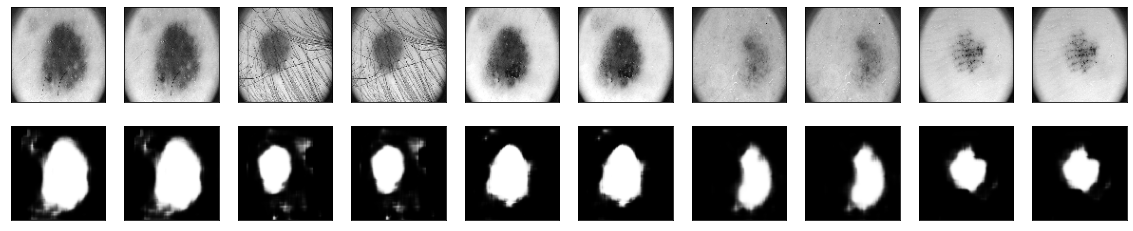

In [ ]:
import matplotlib.pyplot as plt

decoded_imgs = autoencoder.predict(Train_Image)

n = 10 # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(Train_Image[i].reshape(100, 100))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(100, 100))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()